In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statistics as stat
plt.style.use('ggplot')

# Set some Pandas options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [103]:
patients = pd.read_csv("/Users/alistairlawrence/Documents/Dropbox/Ali Work/Research Neuro/GBM Survival/Machine Learning Data Sets/Ali_rf(age)2.csv")
patients.head()

,Sex,Age,Time,Biopsy,IcRET,CRET,Tside,IDHStatus,MGMT,SxDeficit,SxHeadache,SxSeizure,ZeroGy,ThirtyGy,FortyGy,SixtyGy,TMZ
0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1
2,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1
3,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1
4,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,1


<AxesSubplot:xlabel='Time'>

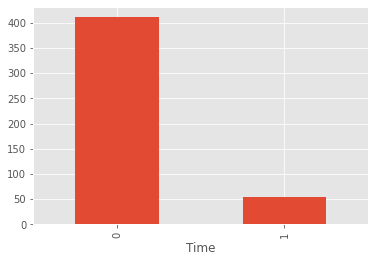

In [26]:
#shows that the groups are not evenly spread - many more dead people than alive after 18months
patients.pivot_table(index='Time', aggfunc='size').plot(kind='bar')

In [3]:
# Create a stratified train/test split. 
# Test set will be 30% of the data.
# Class distribution will be equal for train test and original data

from sklearn.model_selection import train_test_split
train, test = train_test_split(patients, test_size = 0.3, stratify=patients.Time)

<AxesSubplot:title={'center':'Verify that class distributuion in train is same as input data'}, xlabel='Time'>

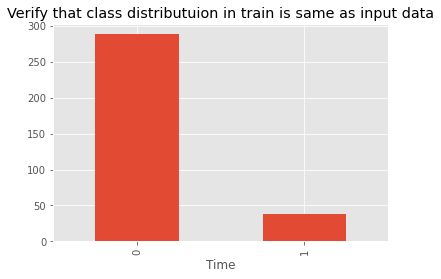

In [4]:
train.pivot_table(index='Time', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')

<AxesSubplot:title={'center':'Verify that class distributuion in test is same as input data'}, xlabel='Time'>

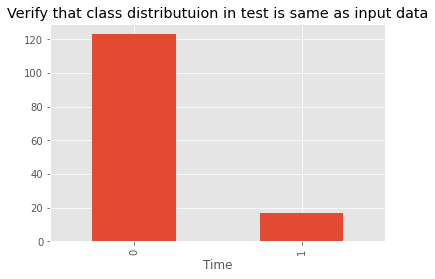

In [5]:
test.pivot_table(index='Time', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')

In [6]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

# Fit the logistic regression on the independent variables of the train data with Time as dependent variable
my_log_reg.fit(train[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']], train['Time'])

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']])


In [7]:

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['Time'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  119 
False positives:  4 
False negatives:  15 
True Positives:  2


In [8]:
#Precision means how well a model succeeds in identifying ONLY positive cases. 
#Recall means how well a model succeeds in identifying ALL the positive cases within the data.


from sklearn.metrics import classification_report
print(classification_report(test['Time'], preds))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       123
           1       0.33      0.12      0.17        17

    accuracy                           0.86       140
   macro avg       0.61      0.54      0.55       140
weighted avg       0.82      0.86      0.83       140



In [122]:
# start to use SMOTE function
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']], train['Time'])

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Time'>

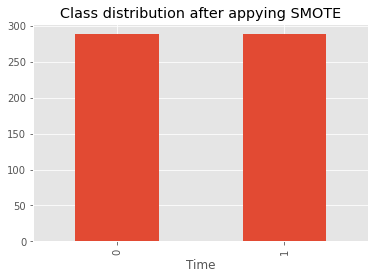

In [123]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Time')


<AxesSubplot:title={'center':'Class distribution after appying SMOTE Test'}, xlabel='Time'>

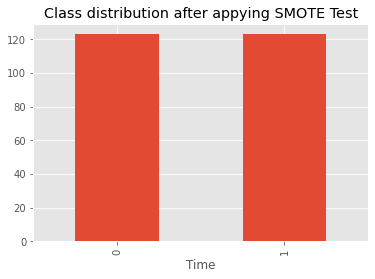

In [124]:
from imblearn.over_sampling import SMOTE
X_resampled2, y_resampled2 = SMOTE().fit_resample(test[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']], test['Time'])
pd.Series(y_resampled2).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE Test', xlabel='Time')


In [125]:
# Instantiate the new Logistic Regression
log_reg_2 = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(X_resampled2)

In [126]:
tn, fp, fn, tp = confusion_matrix(y_resampled2, preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  99 
False positives:  24 
False negatives:  23 
True positives:  100


In [127]:
#Precision means how well a model succeeds in identifying ONLY positive cases. 
#Recall means how well a model succeeds in identifying ALL the positive cases within the data.

print(classification_report(y_resampled2, preds2))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       123
           1       0.81      0.81      0.81       123

    accuracy                           0.81       246
   macro avg       0.81      0.81      0.81       246
weighted avg       0.81      0.81      0.81       246



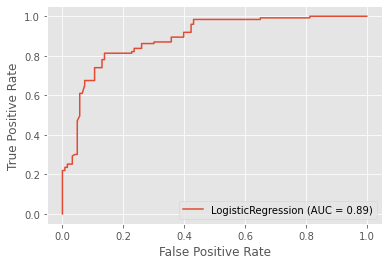

In [144]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

log_reg_2_disp = RocCurveDisplay.from_estimator(log_reg_2, X_resampled2, y_resampled2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

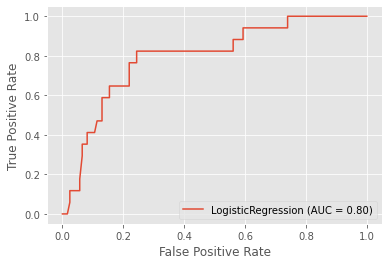

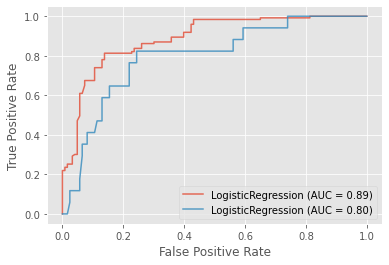

In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

my_log_reg_disp = RocCurveDisplay.from_estimator(my_log_reg, test[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']], test['Time'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ax = plt.gca()
log_reg_2_disp.plot(ax=ax, alpha=0.8)
my_log_reg_disp.plot(ax=ax, alpha=0.8)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('LR ROC curves.png', dpi=300, bbox_inches='tight')
plt.show()

Logistic: f1=0.810 auc=0.880


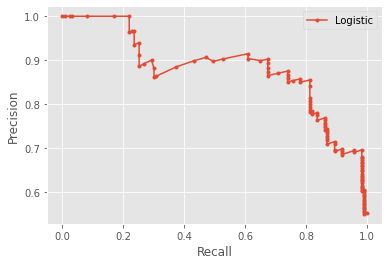

In [162]:
# precision-recall curve and f1 for an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
lr_probs = log_reg_2.predict_proba(X_resampled2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = log_reg_2.predict(X_resampled2)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_resampled2, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_resampled2, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Feature: 0, Score: 0.34811
Feature: 1, Score: 0.81320
Feature: 2, Score: -0.81836
Feature: 3, Score: -0.08891
Feature: 4, Score: 0.90729
Feature: 5, Score: -0.45631
Feature: 6, Score: 0.52164
Feature: 7, Score: 1.24490
Feature: 8, Score: -0.06660
Feature: 9, Score: -0.08236
Feature: 10, Score: 0.14897
Feature: 11, Score: -0.55156
Feature: 12, Score: -0.02791
Feature: 13, Score: -0.06778
Feature: 14, Score: 0.64727
Feature: 15, Score: 0.75461


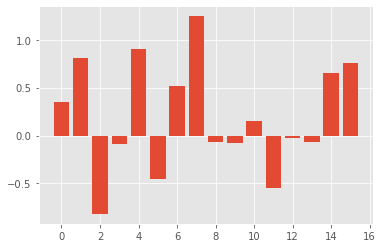

In [182]:
from sklearn.linear_model import LogisticRegression
# get importance
importance = my_log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0

Feature: 0, Score: -0.42917
Feature: 1, Score: 0.76530
Feature: 2, Score: -2.66761
Feature: 3, Score: -1.47103
Feature: 4, Score: -0.25449
Feature: 5, Score: -1.24213
Feature: 6, Score: -0.23897
Feature: 7, Score: 1.21670
Feature: 8, Score: -1.65626
Feature: 9, Score: -1.83849
Feature: 10, Score: -1.52665
Feature: 11, Score: -2.73092
Feature: 12, Score: -2.24693
Feature: 13, Score: -1.77686
Feature: 14, Score: -0.00815
Feature: 15, Score: 0.12881


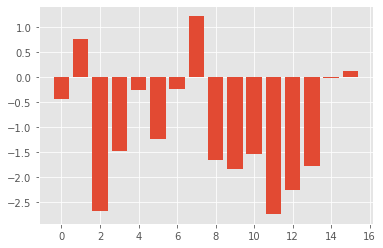

In [168]:
from sklearn.linear_model import LogisticRegression
# get importance
importance = log_reg_2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0

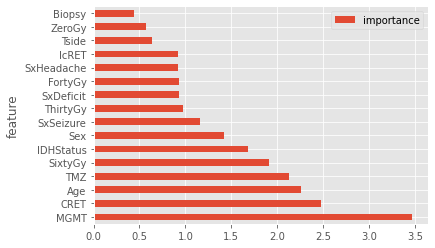

In [181]:
feature_names = ['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, my_log_reg.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.savefig('Feature Importance.png', dpi=300, bbox_inches='tight')
plt.show()

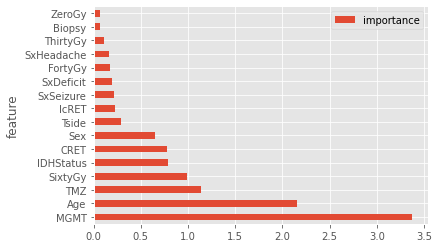

In [183]:
feature_names = ['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, log_reg_2.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.savefig('Feature Importance LR-SMOTE.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100000 decision trees
rf = RandomForestClassifier(n_estimators = 100000, random_state = 42)
# Train the model on training data
rf.fit(train[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']], train['Time'])


RandomForestClassifier(n_estimators=100000, random_state=42)

In [38]:
#We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds.
#We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rf, test[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']], test['Time'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.860 (0.065)


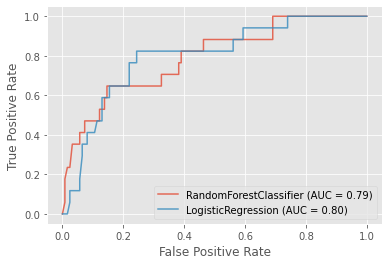

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf, test[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']], test['Time'], ax=ax, alpha=0.8,)
my_log_reg_disp.plot(ax=ax, alpha=0.8)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('RoC Curves noSMOTE.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100000 decision trees
rfSMOTE = RandomForestClassifier(n_estimators = 100000, random_state = 42)
# Train the model on training data
rfSMOTE.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=100000, random_state=42)

In [41]:
#We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds.
#We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfSMOTE, X_resampled2, y_resampled2, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.928 (0.052)


In [138]:
# install graphviz and pydotplus with command - pip install xx
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
# Pull out one tree from the forest
branch = rfSMOTE.estimators_[5]
# Create DOT data
tree.export_graphviz(branch,
                     out_file="tree.dot",
                     feature_names = ['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ'], 
                     class_names= 'Time',
                     filled = True)
#then used an online dot converter tool               

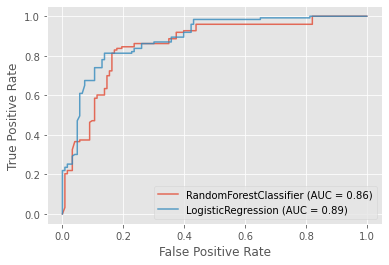

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfSMOTE, X_resampled2, y_resampled2, ax=ax, alpha=0.8,)
log_reg_2_disp.plot(ax=ax, alpha=0.8)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('RoC Curves.png', dpi=300, bbox_inches='tight')
plt.show()
#I added the label to the RF ROC curve and lost the automatic AUC so added it in manually

Feature: 0, Score: 0.06045
Feature: 1, Score: 0.06352
Feature: 2, Score: 0.13187
Feature: 3, Score: 0.04388
Feature: 4, Score: 0.05769
Feature: 5, Score: 0.08121
Feature: 6, Score: 0.02051
Feature: 7, Score: 0.08166
Feature: 8, Score: 0.05695
Feature: 9, Score: 0.03042
Feature: 10, Score: 0.04102
Feature: 11, Score: 0.06265
Feature: 12, Score: 0.04697
Feature: 13, Score: 0.01634
Feature: 14, Score: 0.09436
Feature: 15, Score: 0.11050


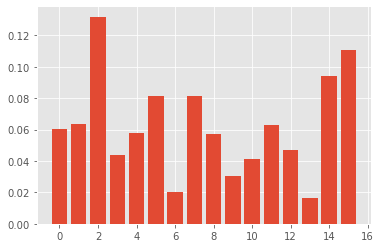

In [169]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# get importance
importance = rfSMOTE.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

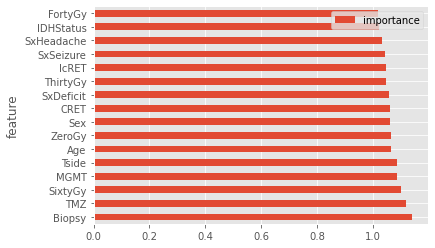

In [184]:
from sklearn.inspection import permutation_importance
feature_names = ['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, rfSMOTE.feature_importances_)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.savefig('RFSMOTE Feature Importance.png', dpi=300, bbox_inches='tight')
plt.show()

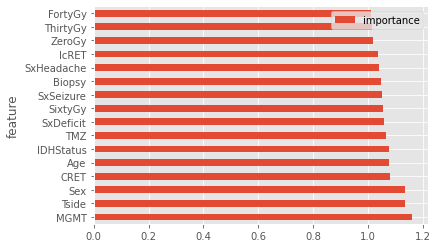

In [185]:
from sklearn.inspection import permutation_importance
feature_names = ['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, rf.feature_importances_)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.savefig('RF Feature Importance.png', dpi=300, bbox_inches='tight')
plt.show()

RandomForest: f1=0.758 auc=0.831


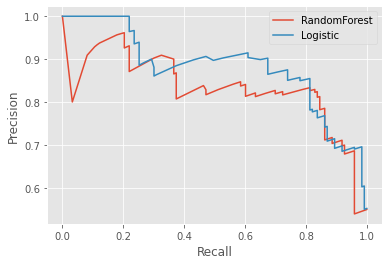

In [167]:
# predict probabilities
rf_probs = rfSMOTE.predict_proba(X_resampled2)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
yhat = rfSMOTE.predict(X_resampled2)
# calculate precision and recall for each threshold
rf_precision, rf_recall, _ = precision_recall_curve(y_resampled2, rf_probs)
# calculate scores
rf_f1, rf_auc = f1_score(y_resampled2, yhat), auc(rf_recall, rf_precision)
# summarize scores
print('RandomForest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
pyplot.plot(rf_recall, rf_precision, label='RandomForest')
pyplot.plot(lr_recall, lr_precision, label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
pyplot.savefig('Precision_Recall Curves.png', dpi=300, bbox_inches='tight')
# show the plot
pyplot.show()

In [140]:
# Use the forest's predict method on the test data
predictions = rfSMOTE.predict(train[['Sex','Age','Biopsy','IcRET','CRET','Tside','IDHStatus','MGMT','SxDeficit','SxHeadache','SxSeizure','ZeroGy','ThirtyGy','FortyGy','SixtyGy','TMZ']])
print('Predicted Class: %d' % predictions[0])

Predicted Class: 1
